In [1]:
import pandas as pd

In [35]:
import matplotlib.pyplot as plt


In [3]:
from prophet import Prophet


In [23]:
df = pd.read_csv("C:/Users/Harshitha/Documents/Ativeera_Sales_dataAnalysis/sales_cleaned_data.csv")


In [25]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')


In [6]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')


In [26]:
monthly = df.groupby('Date')['Revenue'].sum().reset_index()


In [27]:
monthly.rename(columns={'Date': 'ds', 'Revenue': 'y'}, inplace=True)


In [28]:
model = Prophet()


In [29]:
model.fit(monthly)

00:27:08 - cmdstanpy - INFO - Chain [1] start processing
00:27:09 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future = model.make_future_dataframe(periods=6, freq='ME')


In [32]:
forecast = model.predict(future)

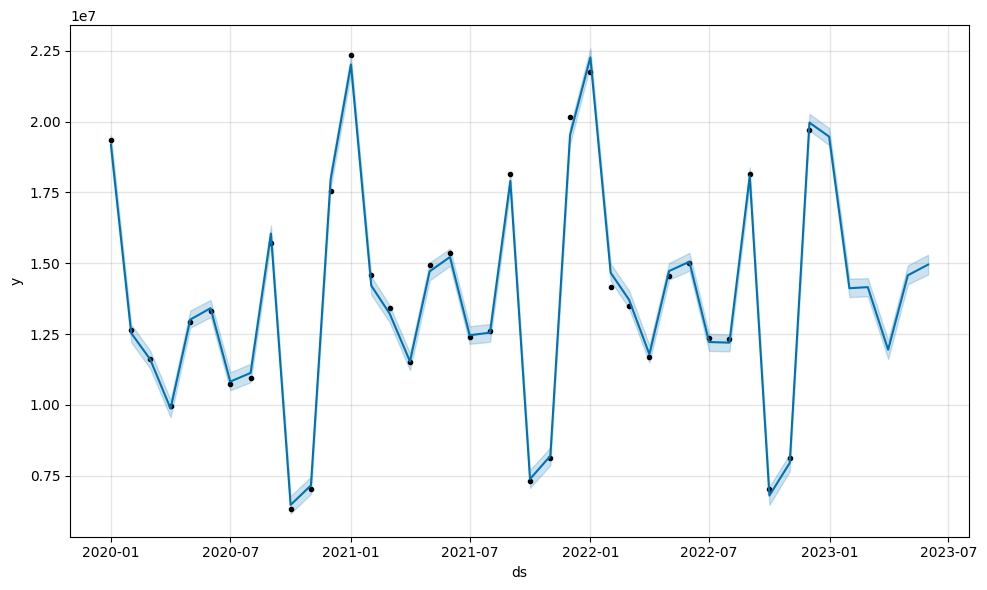

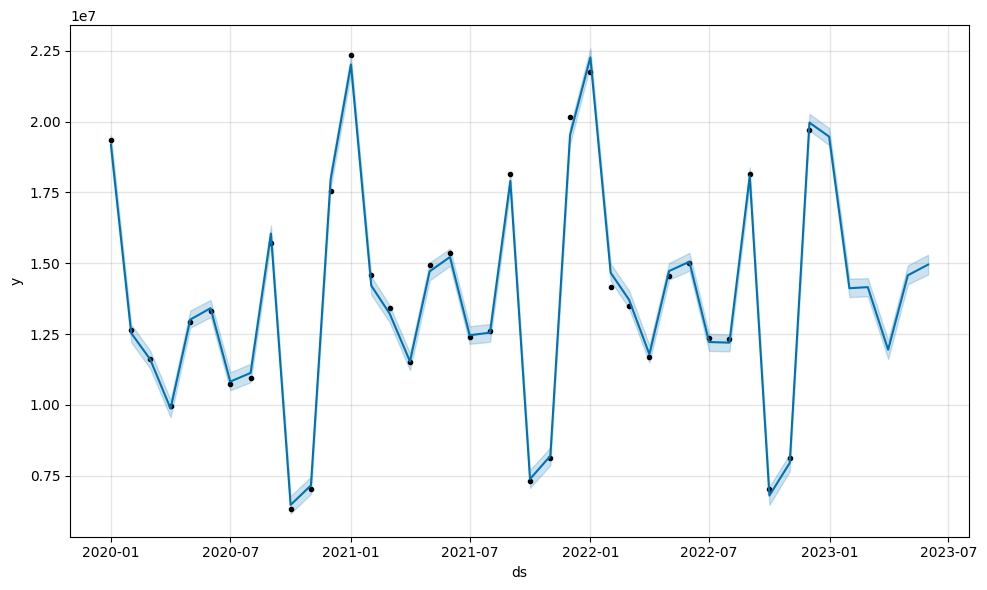

In [33]:
model.plot(forecast)


Text(0.5, 1.0, 'Revenue Forecast (Prophet)')

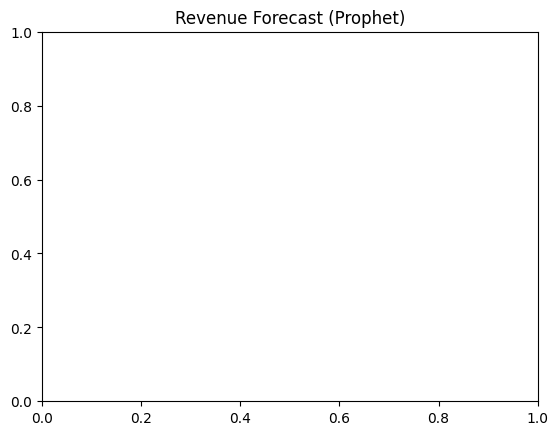

In [36]:
plt.title("Revenue Forecast (Prophet)")

Text(0.5, 0, 'Date')

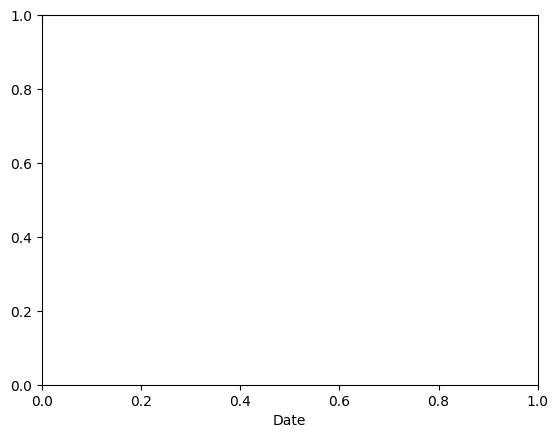

In [37]:
plt.xlabel("Date")


Text(0, 0.5, 'Revenue')

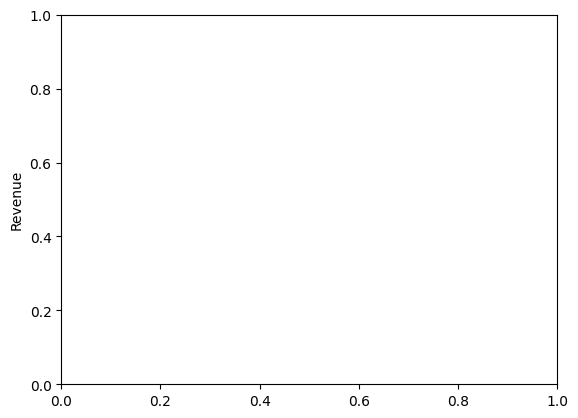

In [38]:
plt.ylabel("Revenue")


In [39]:
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [40]:
plt.show()

In [41]:

forecast_result = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


In [43]:

forecast_result.loc[:, 'Type'] = forecast_result['ds'].isin(monthly['ds']).map({True: 'Actual', False: 'Forecast'})


In [44]:
forecast_result.to_csv("revenue_forecast_output.csv", index=False)
